In [2]:
import pandas as pd 
import numpy as np 
import string
import csv
import re
import nltk
import random
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
import plotly.express as px
from pandas import DataFrame
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

from xgboost import plot_importance

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer


import dtale

import os
os.chdir(r"") 

df = pd.read_csv('UniversalBank.csv')


pd.set_option('display.max_colwidth', -1)

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
print (df.shape)

(5000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df[df['Experience'] < 0]['Experience'].count()

52

In [9]:
#Let us clean the Experience column by removing the negative entries with appropriate values based on age
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


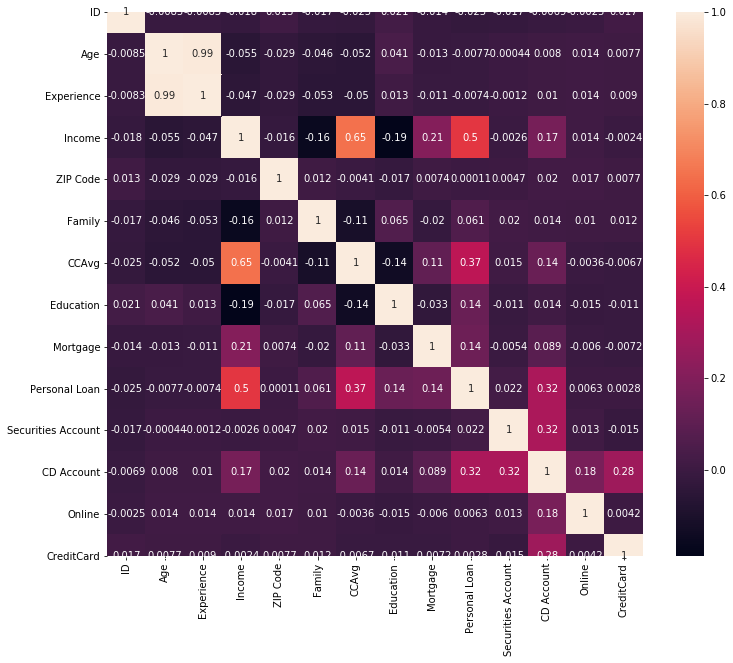

In [10]:

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [11]:
#Since Age and Experience are highly correlated (0.99), so we can drop either of the column. I did the cleaning of experience column becasue I want to use it becasue I believe income depends more on years of experience than age
#Finding the unique ages which have -1, -2 and -3 entries in the Experience column
df[df['Experience'] == -1]['Age'].value_counts()

25    17
24    6 
23    6 
29    3 
26    1 
Name: Age, dtype: int64

In [12]:
df[df['Experience'] == -2]['Age'].value_counts()

24    9
23    4
28    1
25    1
Name: Age, dtype: int64

In [13]:
df[df['Experience'] == -3]['Age'].value_counts()

23    2
24    2
Name: Age, dtype: int64

In [14]:
# We will find the mean of positive experience values for above ages and use it to replace

# having -1 exp
a = df[df['Experience'] == -1]['Age'].value_counts().index.tolist()
x = df[df['Experience'] == -1]['Experience'].index.tolist()
for i in x:
    df.loc[i,'Experience'] = df[(df['Age'].isin(a)) & (df.Experience > 0)].Experience.mean()
    
    
# having -2 exp
b = df[df['Experience'] == -2]['Age'].value_counts().index.tolist()
y = df[df['Experience'] == -2]['Experience'].index.tolist()
for i in y:
    df.loc[i,'Experience'] = df[(df['Age'].isin(b)) & (df.Experience > 0)].Experience.mean()
    
    
# having -3 exp
c = df[df['Experience'] == -3]['Age'].value_counts().index.tolist()
z = df[df['Experience'] == -3]['Experience'].index.tolist()
for i in z:
    df.loc[i,'Experience'] = df[(df['Age'].isin(c)) & (df.Experience > 0)].Experience.mean()

In [15]:
df[df['Experience'] < 0]['Experience'].count()

0

In [16]:
#creating different dataframes of cleaned data to perform one hot encoding, scaling, and both together
df_onehot = df
df_scale = df

### Model Building

In [17]:
#Now working on model building as we have cleaned data
df['Personal Loan'].value_counts()

0    4520
1    480 
Name: Personal Loan, dtype: int64

In [18]:
# 480 customers out of 5000 had opted for personal loan 

In [19]:
# We will drop ID and ZIP Code column as it is not relevant to customer buying the personal loan 

df.drop(columns=['ZIP Code','ID'], inplace=True)


In [20]:
#rearranging columns

df = df.loc[:,['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard','Personal Loan']]
df.head()
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1.0,49,4,1.6,1,0,1,0,0,0,0
1,45,19.0,34,3,1.5,1,0,1,0,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,3,0,0,0,1,0,0
4996,30,4.0,15,4,0.4,1,85,0,0,1,0,0
4997,63,39.0,24,2,0.3,3,0,0,0,0,0,0
4998,65,40.0,49,3,0.5,2,0,0,0,1,0,0


In [21]:
#We will use experience column and not use age column as both are highly correlated

x = df.iloc[:,1:11]
y = df.iloc[:,-1]
x

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1.0,49,4,1.6,1,0,1,0,0,0
1,19.0,34,3,1.5,1,0,1,0,0,0
2,15.0,11,1,1.0,1,0,0,0,0,0
3,9.0,100,1,2.7,2,0,0,0,0,0
4,8.0,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,3.0,40,1,1.9,3,0,0,0,1,0
4996,4.0,15,4,0.4,1,85,0,0,1,0
4997,39.0,24,2,0.3,3,0,0,0,0,0
4998,40.0,49,3,0.5,2,0,0,0,1,0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=10)


In [23]:

print("Training Personal Loan Values of customer who bought    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan Values of customer who didn't buy   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan Values of customer who bought        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan Values of customer who didn't buy       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training Personal Loan Values of customer who bought    : 387 (9.68%)
Training Personal Loan Values of customer who didn't buy   : 3613 (90.33%)

Test Personal Loan Values of customer who bought        : 93 (9.30%)
Test Personal Loan Values of customer who didn't buy       : 907 (90.70%)



In [24]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))
models

[('LR', LogisticRegression(max_iter=1000)),
 ('DT', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('RF', RandomForestClassifier()),
 ('SVC', SVC())]

In [32]:
my_cv = []
my_names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv = cross_validate(model, x_train, y_train, cv=kfold, scoring= ("accuracy","precision", "recall"))
    my_names.append(name)
    my_cv.append(cv['test_accuracy'])
    msg = ('Model:%s Accuracy:%f Precision:%f Recall:%f' % (name, np.mean(cv['test_accuracy']),np.mean(cv['test_precision']),np.mean(cv['test_recall'])))
    print(msg)


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:LR Accuracy:0.949500 Precision:0.808094 Recall:0.625843
Model:DT Accuracy:0.981250 Precision:0.913908 Recall:0.891498


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:KNN Accuracy:0.912750 Precision:0.575020 Recall:0.390621


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:RF Accuracy:0.986750 Precision:0.978419 Recall:0.883806


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:SVC Accuracy:0.909500 Precision:0.717024 Recall:0.121390


In [33]:
#Ensemble 

In [34]:
ensembles = []
ensembles.append(('Ada', AdaBoostClassifier()))
ensembles.append(('GB', GradientBoostingClassifier()))
ensembles.append(('BC', BaggingClassifier()))
ensembles

[('Ada', AdaBoostClassifier()),
 ('GB', GradientBoostingClassifier()),
 ('BC', BaggingClassifier())]

In [36]:
my_cv = []
my_names = []

for name, model in ensembles:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv = cross_validate(model, x_train, y_train, cv=kfold, scoring= ("accuracy","precision", "recall"))
    my_names.append(name)
    my_cv.append(cv['test_accuracy'])
    msg = ('Model:%s Accuracy:%f Precision:%f Recall:%f' % (name, np.mean(cv['test_accuracy']),np.mean(cv['test_precision']),np.mean(cv['test_recall'])))
    print(msg)


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:Ada Accuracy:0.968250 Precision:0.882981 Recall:0.780634


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:GB Accuracy:0.986250 Precision:0.961297 Recall:0.894130


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:BC Accuracy:0.982500 Precision:0.952696 Recall:0.863293


### One hot encoding 

In [37]:
#df_onehot = df
df_onehot.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


In [38]:

# One hot encoding Family column
one_hot = pd.get_dummies(df_onehot['Family'],prefix='Family')
# Drop column B as it is now encoded
df_onehot = df_onehot.drop('Family',axis = 1)
# Join the encoded df
df_onehot = df_onehot.join(one_hot)

# One hot encoding Education column
one_hot = pd.get_dummies(df_onehot['Education'],prefix='Education')
# Drop column B as it is now encoded
df_onehot = df_onehot.drop('Education',axis = 1)
# Join the encoded df
df_onehot = df_onehot.join(one_hot)


# One hot encoding Securities Account column
one_hot = pd.get_dummies(df_onehot['Securities Account'],prefix='Securities Account')
# Drop column B as it is now encoded
df_onehot = df_onehot.drop('Securities Account',axis = 1)
# Join the encoded df
df_onehot = df_onehot.join(one_hot)

# One hot encoding CD Account column
one_hot = pd.get_dummies(df_onehot['CD Account'],prefix='CD Account')
# Drop column B as it is now encoded
df_onehot = df_onehot.drop('CD Account',axis = 1)
# Join the encoded df
df_onehot = df_onehot.join(one_hot)

# One hot encoding Online column
one_hot = pd.get_dummies(df_onehot['Online'],prefix='Online')
# Drop column B as it is now encoded
df_onehot = df_onehot.drop('Online',axis = 1)
# Join the encoded df
df_onehot = df_onehot.join(one_hot)

# One hot encoding CreditCard column
one_hot = pd.get_dummies(df_onehot['CreditCard'],prefix='CreditCard')
# Drop column B as it is now encoded
df_onehot = df_onehot.drop('CreditCard',axis = 1)
# Join the encoded df
df_onehot = df_onehot.join(one_hot)

df_onehot  

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,1.0,49,1.6,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,45,19.0,34,1.5,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,39,15.0,11,1.0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,35,9.0,100,2.7,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,35,8.0,45,1.0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1.9,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4996,30,4.0,15,0.4,85,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
4997,63,39.0,24,0.3,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4998,65,40.0,49,0.5,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0


In [39]:
col_name = 'Personal Loan'
first_col = df_onehot.pop(col_name)
df_onehot.insert(0, col_name, first_col)
df_onehot

,Personal Loan,Age,Experience,Income,CCAvg,Mortgage,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,0,25,1.0,49,1.6,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,0,45,19.0,34,1.5,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,0,39,15.0,11,1.0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,0,35,9.0,100,2.7,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,0,35,8.0,45,1.0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,29,3.0,40,1.9,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4996,0,30,4.0,15,0.4,85,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
4997,0,63,39.0,24,0.3,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4998,0,65,40.0,49,0.5,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0


In [40]:
x = df_onehot.iloc[:,2:21]
y = df_onehot.iloc[:,0]
x

,Experience,Income,CCAvg,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,1.0,49,1.6,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0
1,19.0,34,1.5,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0
2,15.0,11,1.0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
3,9.0,100,2.7,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,8.0,45,1.0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.0,40,1.9,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0
4996,4.0,15,0.4,85,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0
4997,39.0,24,0.3,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0
4998,40.0,49,0.5,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=10)


In [42]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))
models

[('LR', LogisticRegression(max_iter=1000)),
 ('DT', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('RF', RandomForestClassifier()),
 ('SVC', SVC())]

In [43]:
my_cv = []
my_names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv = cross_validate(model, x_train, y_train, cv=kfold, scoring= ("accuracy","precision", "recall"))
    my_names.append(name)
    my_cv.append(cv['test_accuracy'])
    msg = ('Model:%s Accuracy:%f Precision:%f Recall:%f' % (name, np.mean(cv['test_accuracy']),np.mean(cv['test_precision']),np.mean(cv['test_recall'])))
    print(msg)


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model:LR Accuracy:0.957250 Precision:0.867860 Recall:0.659042
Model:DT Accuracy:0.982750 Precision:0.913808 Recall:0.907018


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:KNN Accuracy:0.909500 Precision:0.552411 Recall:0.362281


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:RF Accuracy:0.987250 Precision:0.975174 Recall:0.891565


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:SVC Accuracy:0.909750 Precision:0.716190 Recall:0.123954


In [44]:
#Ensemble using one hot encoded data

In [45]:
ensembles = []
ensembles.append(('Ada', AdaBoostClassifier()))
ensembles.append(('GB', GradientBoostingClassifier()))
ensembles.append(('BC', BaggingClassifier()))
ensembles

[('Ada', AdaBoostClassifier()),
 ('GB', GradientBoostingClassifier()),
 ('BC', BaggingClassifier())]

In [46]:
my_cv = []
my_names = []

for name, model in ensembles:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv = cross_validate(model, x_train, y_train, cv=kfold, scoring= ("accuracy","precision", "recall"))
    my_names.append(name)
    my_cv.append(cv['test_accuracy'])
    msg = ('Model:%s Accuracy:%f Precision:%f Recall:%f' % (name, np.mean(cv['test_accuracy']),np.mean(cv['test_precision']),np.mean(cv['test_recall'])))
    print(msg)


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:Ada Accuracy:0.966500 Precision:0.872735 Recall:0.772807


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:GB Accuracy:0.986500 Precision:0.963636 Recall:0.896694


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:BC Accuracy:0.986000 Precision:0.972325 Recall:0.881039


### Scaling Data

In [47]:
cols = ['Income','CCAvg','Mortgage','Experience']
cols2 = [ 'Age','Family', 'Education',
        'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']
foo = df_scale.loc[:,['Income','CCAvg','Mortgage','Experience']]
scaler = StandardScaler().fit(foo)

foo = pd.DataFrame(scaler.transform(foo))
foo.columns = ['Income','CCAvg','Mortgage','Experience']

df_scaled = pd.concat([foo, df.loc[:,cols2]], axis=1)
df_scaled = df_scaled.loc[:,['Age','Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard','Personal Loan']]
df_scaled

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,-1.681305,-0.538229,4,-0.193385,1,-0.555524,1,0,0,0,0
1,45,-0.100952,-0.864109,3,-0.250611,1,-0.555524,1,0,0,0,0
2,39,-0.452142,-1.363793,1,-0.536736,1,-0.555524,0,0,0,0,0
3,35,-0.978926,0.569765,1,0.436091,2,-0.555524,0,0,0,0,0
4,35,-1.066723,-0.625130,4,-0.536736,2,-0.555524,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,-1.505710,-0.733757,1,-0.021710,3,-0.555524,0,0,1,0,0
4996,30,-1.417913,-1.276892,4,-0.880087,1,0.280238,0,0,1,0,0
4997,63,1.654995,-1.081363,2,-0.937312,3,-0.555524,0,0,0,0,0
4998,65,1.742792,-0.538229,3,-0.822862,2,-0.555524,0,0,1,0,0


In [48]:
df_scaled.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,2.572165e-16,1.939449e-16,2.396400,-2.078338e-17,1.881000,2.810197e-16,0.104400,0.06040,0.596800,0.294000,0.096000
std,11.463166,1.000100e+00,1.000100e+00,1.147663,1.000100e+00,0.839869,1.000100e+00,0.305809,0.23825,0.490589,0.455637,0.294621
min,23.000000,-1.769102e+00,-1.428969e+00,1.000000,-1.108987e+00,1.000000,-5.555239e-01,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,-8.911285e-01,-7.554825e-01,1.000000,-7.084116e-01,1.000000,-5.555239e-01,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,-1.315495e-02,-2.123482e-01,2.000000,-2.506106e-01,2.000000,-5.555239e-01,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,8.648186e-01,5.263146e-01,3.000000,3.216407e-01,3.000000,4.375576e-01,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,2.006184e+00,3.263712e+00,4.000000,4.613525e+00,3.000000,5.688108e+00,1.000000,1.00000,1.000000,1.000000,1.000000


In [49]:
df_scaled = df_scaled.loc[:,['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard','Personal Loan']]
df_scaled

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,-1.681305,-0.538229,4,-0.193385,1,-0.555524,1,0,0,0,0
1,45,-0.100952,-0.864109,3,-0.250611,1,-0.555524,1,0,0,0,0
2,39,-0.452142,-1.363793,1,-0.536736,1,-0.555524,0,0,0,0,0
3,35,-0.978926,0.569765,1,0.436091,2,-0.555524,0,0,0,0,0
4,35,-1.066723,-0.625130,4,-0.536736,2,-0.555524,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,-1.505710,-0.733757,1,-0.021710,3,-0.555524,0,0,1,0,0
4996,30,-1.417913,-1.276892,4,-0.880087,1,0.280238,0,0,1,0,0
4997,63,1.654995,-1.081363,2,-0.937312,3,-0.555524,0,0,0,0,0
4998,65,1.742792,-0.538229,3,-0.822862,2,-0.555524,0,0,1,0,0


In [50]:
#We will use experience column and not use age column as both are highly correlated

x = df_scaled.iloc[:,1:11]
y = df_scaled.iloc[:,-1]
x

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.681305,-0.538229,4,-0.193385,1,-0.555524,1,0,0,0
1,-0.100952,-0.864109,3,-0.250611,1,-0.555524,1,0,0,0
2,-0.452142,-1.363793,1,-0.536736,1,-0.555524,0,0,0,0
3,-0.978926,0.569765,1,0.436091,2,-0.555524,0,0,0,0
4,-1.066723,-0.625130,4,-0.536736,2,-0.555524,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,-1.505710,-0.733757,1,-0.021710,3,-0.555524,0,0,1,0
4996,-1.417913,-1.276892,4,-0.880087,1,0.280238,0,0,1,0
4997,1.654995,-1.081363,2,-0.937312,3,-0.555524,0,0,0,0
4998,1.742792,-0.538229,3,-0.822862,2,-0.555524,0,0,1,0


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=10)


In [52]:

print("Training Personal Loan Values of customer who bought    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan Values of customer who didn't buy   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan Values of customer who bought        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan Values of customer who didn't buy       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training Personal Loan Values of customer who bought    : 387 (9.68%)
Training Personal Loan Values of customer who didn't buy   : 3613 (90.33%)

Test Personal Loan Values of customer who bought        : 93 (9.30%)
Test Personal Loan Values of customer who didn't buy       : 907 (90.70%)



In [53]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))
models

[('LR', LogisticRegression(max_iter=1000)),
 ('DT', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('RF', RandomForestClassifier()),
 ('SVC', SVC())]

In [54]:
my_cv = []
my_names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv = cross_validate(model, x_train, y_train, cv=kfold, scoring= ("accuracy","precision", "recall"))
    my_names.append(name)
    my_cv.append(cv['test_accuracy'])
    msg = ('Model:%s Accuracy:%f Precision:%f Recall:%f' % (name, np.mean(cv['test_accuracy']),np.mean(cv['test_precision']),np.mean(cv['test_recall'])))
    print(msg)


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:LR Accuracy:0.950000 Precision:0.813525 Recall:0.625843
Model:DT Accuracy:0.981500 Precision:0.915830 Recall:0.891498


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:KNN Accuracy:0.963750 Precision:0.974651 Recall:0.643725


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:RF Accuracy:0.984750 Precision:0.974878 Recall:0.865789


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:SVC Accuracy:0.975000 Precision:0.971597 Recall:0.765182


In [55]:
#Ensemble using scaled data

In [56]:
ensembles = []
ensembles.append(('Ada', AdaBoostClassifier()))
ensembles.append(('GB', GradientBoostingClassifier()))
ensembles.append(('BC', BaggingClassifier()))
ensembles

[('Ada', AdaBoostClassifier()),
 ('GB', GradientBoostingClassifier()),
 ('BC', BaggingClassifier())]

In [57]:
my_cv = []
my_names = []

for name, model in ensembles:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv = cross_validate(model, x_train, y_train, cv=kfold, scoring= ("accuracy","precision", "recall"))
    my_names.append(name)
    my_cv.append(cv['test_accuracy'])
    msg = ('Model:%s Accuracy:%f Precision:%f Recall:%f' % (name, np.mean(cv['test_accuracy']),np.mean(cv['test_precision']),np.mean(cv['test_recall'])))
    print(msg)


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:Ada Accuracy:0.968250 Precision:0.882981 Recall:0.780634


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:GB Accuracy:0.986250 Precision:0.961297 Recall:0.894130


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:BC Accuracy:0.985000 Precision:0.966877 Recall:0.876181


### One hot encoding on the scaled data

In [58]:
df_scaled

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,-1.681305,-0.538229,4,-0.193385,1,-0.555524,1,0,0,0,0
1,45,-0.100952,-0.864109,3,-0.250611,1,-0.555524,1,0,0,0,0
2,39,-0.452142,-1.363793,1,-0.536736,1,-0.555524,0,0,0,0,0
3,35,-0.978926,0.569765,1,0.436091,2,-0.555524,0,0,0,0,0
4,35,-1.066723,-0.625130,4,-0.536736,2,-0.555524,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,-1.505710,-0.733757,1,-0.021710,3,-0.555524,0,0,1,0,0
4996,30,-1.417913,-1.276892,4,-0.880087,1,0.280238,0,0,1,0,0
4997,63,1.654995,-1.081363,2,-0.937312,3,-0.555524,0,0,0,0,0
4998,65,1.742792,-0.538229,3,-0.822862,2,-0.555524,0,0,1,0,0


In [59]:

# One hot encoding Family column
one_hot = pd.get_dummies(df_scaled['Family'],prefix='Family')
# Drop column B as it is now encoded
df_scaled = df_scaled.drop('Family',axis = 1)
# Join the encoded df
df_scaled = df_scaled.join(one_hot)

# One hot encoding Education column
one_hot = pd.get_dummies(df_scaled['Education'],prefix='Education')
# Drop column B as it is now encoded
df_scaled = df_scaled.drop('Education',axis = 1)
# Join the encoded df
df_scaled = df_scaled.join(one_hot)


# One hot encoding Securities Account column
one_hot = pd.get_dummies(df_scaled['Securities Account'],prefix='Securities Account')
# Drop column B as it is now encoded
df_scaled = df_scaled.drop('Securities Account',axis = 1)
# Join the encoded df
df_scaled = df_scaled.join(one_hot)

# One hot encoding CD Account column
one_hot = pd.get_dummies(df_scaled['CD Account'],prefix='CD Account')
# Drop column B as it is now encoded
df_scaled = df_scaled.drop('CD Account',axis = 1)
# Join the encoded df
df_scaled = df_scaled.join(one_hot)

# One hot encoding Online column
one_hot = pd.get_dummies(df_scaled['Online'],prefix='Online')
# Drop column B as it is now encoded
df_scaled = df_scaled.drop('Online',axis = 1)
# Join the encoded df
df_scaled = df_scaled.join(one_hot)

# One hot encoding CreditCard column
one_hot = pd.get_dummies(df_scaled['CreditCard'],prefix='CreditCard')
# Drop column B as it is now encoded
df_scaled = df_scaled.drop('CreditCard',axis = 1)
# Join the encoded df
df_scaled = df_scaled.join(one_hot)

df_scaled  

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,-1.681305,-0.538229,-0.193385,-0.555524,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,45,-0.100952,-0.864109,-0.250611,-0.555524,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,39,-0.452142,-1.363793,-0.536736,-0.555524,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,35,-0.978926,0.569765,0.436091,-0.555524,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,35,-1.066723,-0.625130,-0.536736,-0.555524,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,-1.505710,-0.733757,-0.021710,-0.555524,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4996,30,-1.417913,-1.276892,-0.880087,0.280238,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
4997,63,1.654995,-1.081363,-0.937312,-0.555524,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4998,65,1.742792,-0.538229,-0.822862,-0.555524,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0


In [60]:
col_name = 'Personal Loan'
first_col = df_onehot.pop(col_name)
df_onehot.insert(0, col_name, first_col)
df_onehot

,Personal Loan,Age,Experience,Income,CCAvg,Mortgage,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,0,25,1.0,49,1.6,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,0,45,19.0,34,1.5,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,0,39,15.0,11,1.0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,0,35,9.0,100,2.7,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,0,35,8.0,45,1.0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,29,3.0,40,1.9,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4996,0,30,4.0,15,0.4,85,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
4997,0,63,39.0,24,0.3,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4998,0,65,40.0,49,0.5,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0


In [61]:
x = df_onehot.iloc[:,2:21]
y = df_onehot.iloc[:,0]
x

,Experience,Income,CCAvg,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,1.0,49,1.6,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0
1,19.0,34,1.5,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0
2,15.0,11,1.0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
3,9.0,100,2.7,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,8.0,45,1.0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.0,40,1.9,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0
4996,4.0,15,0.4,85,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0
4997,39.0,24,0.3,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0
4998,40.0,49,0.5,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=10)



In [63]:

print("Training Personal Loan Values of customer who bought    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan Values of customer who didn't buy   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan Values of customer who bought        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan Values of customer who didn't buy       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training Personal Loan Values of customer who bought    : 387 (9.68%)
Training Personal Loan Values of customer who didn't buy   : 3613 (90.33%)

Test Personal Loan Values of customer who bought        : 93 (9.30%)
Test Personal Loan Values of customer who didn't buy       : 907 (90.70%)



In [64]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))
models


[('LR', LogisticRegression(max_iter=1000)),
 ('DT', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('RF', RandomForestClassifier()),
 ('SVC', SVC())]

In [65]:
my_cv = []
my_names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv = cross_validate(model, x_train, y_train, cv=kfold, scoring= ("accuracy","precision", "recall"))
    my_names.append(name)
    my_cv.append(cv['test_accuracy'])
    msg = ('Model:%s Accuracy:%f Precision:%f Recall:%f' % (name, np.mean(cv['test_accuracy']),np.mean(cv['test_precision']),np.mean(cv['test_recall'])))
    print(msg)


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model:LR Accuracy:0.957250 Precision:0.867860 Recall:0.659042
Model:DT Accuracy:0.981000 Precision:0.904312 Recall:0.899258


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:KNN Accuracy:0.909500 Precision:0.552411 Recall:0.362281


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:RF Accuracy:0.986750 Precision:0.980066 Recall:0.881309


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:SVC Accuracy:0.909750 Precision:0.716190 Recall:0.123954


In [66]:
ensembles = []
ensembles.append(('Ada', AdaBoostClassifier()))
ensembles.append(('GB', GradientBoostingClassifier()))
ensembles.append(('BC', BaggingClassifier()))
ensembles

[('Ada', AdaBoostClassifier()),
 ('GB', GradientBoostingClassifier()),
 ('BC', BaggingClassifier())]

In [67]:
my_cv = []
my_names = []

for name, model in ensembles:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv = cross_validate(model, x_train, y_train, cv=kfold, scoring= ("accuracy","precision", "recall"))
    my_names.append(name)
    my_cv.append(cv['test_accuracy'])
    msg = ('Model:%s Accuracy:%f Precision:%f Recall:%f' % (name, np.mean(cv['test_accuracy']),np.mean(cv['test_precision']),np.mean(cv['test_recall'])))
    print(msg)


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:Ada Accuracy:0.966500 Precision:0.872735 Recall:0.772807


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:GB Accuracy:0.986500 Precision:0.963636 Recall:0.896694


C:\Users\pruth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Model:BC Accuracy:0.986250 Precision:0.966494 Recall:0.888799
